# 学習の目標
- CNNの概要を理解する
- CNNのモデルを使った画像認識モデルの実装方法を理解する

## 事前準備
今回はGoogle Driveとの連携を行うため、以下のコードを実行してマウントします。  
Google ColabはDriveとの連携により、ドライブ上のデータを使用して学習することや、Drive上のコードをimportして利用することができます。

このコードが入っていたフォルダから、「Code」というフォルダを自分のMy Driveにアップロードしてください。  
今回の演習では、このMy Drive内の「Code」フォルダに含まれるコードをimportし、CNNの学習を行います。

In [ ]:
# Google driveのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## CNN:Convolution Neural Networkとは

CNNは画像認識の分野においてよく用いられる手法で、ニューラルネットワークに「畳み込み」という操作を導入したものです。\
**畳み込み(convolution)**とは画像処理でよく利用される手法です。カーネル(またはフィルター)と呼ばれる格子状の数値データと、カーネルと同サイズの部分画像(ウィンドウ)の数値データについて、要素ごとの積の和を計算することで、1つの数値に変換する処理のことです。この変換処理を、ウィンドウをずらしながら処理を行うことで、小さい格子状の数値データに変換します。\
なお、このウィンドウをずらす操作のことを**ストライド**と呼びます。

## 代表的なCNNアーキテクチャ

### LeNet-5 (1998)
LeNet-5は、Yann LeCunとそのチームによって開発された、最も初期の畳み込みネットワークの1つです。手書き数字を認識するために訓練され、画期的なイノベーションとなりました。
LeNet-5のアーキテクチャは、2組の畳み込み層とプーリング層、それに続く平坦化畳み込み層で構成されています。その上に、2つの完全接続層とソフトマックス分類器があります。
<figure align="center">
  <img src="https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg" width="700">
  <figcaption>出典：https://www.datasciencecentral.com/</figcaption>
</figure>

### AlexNet (2012)
AlexNetはトロント大学のチームによって開発され、主にAlex Krizhevskyとその同僚Ilya Sutskeverが、彼らの博士課程指導教員Geoffrey Hintonの支援を受けながら開発しました。彼らの発表した論文の初期結果では、高品質なパフォーマンスを得るためにはモデルの深さが必要であり、計算量は多いものの、GPUの助けを借りることができることが発見されました。比較のために、1998年にYann LeCunが開発した最初の畳み込みニューラルネットワークであるLeNet-5は、7層（3層は畳み込み層）、6万個の学習可能なパラメータで構成されています。AlexNetは8層（5層は畳み込み層）で構成され、学習可能なパラメータは6,000万個です。AlexNetは、GPU、連続した畳み込み層、ReLU活性化関数を画像認識タスクに使用するきっかけとなく、コンピュータビジョンにおける重要な作品の1つであると考えられています。

<figure align="center">
  <img src="https://www.researchgate.net/publication/320052364/figure/fig1/AS:543136445198336@1506505227088/Scheme-of-the-AlexNet-network-used.png" width="700">
  <figcaption>出典：https://www.researchgate.net/publication/320052364/</figcaption>
</figure>

### VGGNet (2014)
VGG（Visual Geometry Group）は、16層（VGG-16）または19層（VGG-19）の畳み込み層からなり、畳み込み層以外には、プーリング層と完全連結層のみを用いたアーキテクチャです。VGG16は、オックスフォード大学のKaren SimonyanとAndrew Zissermanが開発され、大きなサイズのフィルターを複数の小さなフィルターに置き換えることで、AlexNetを改良しました。

<figure align="center">
  <img src="https://www.researchgate.net/profile/Max-Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png" width="700">
  <figcaption>出典：https://www.researchgate.net/profile/Max-Ferguson/publication/322512435/</figcaption>
</figure>


### GoogLeNet (2014)
GoogLeNetは、その名前から推測できるように、Googleが設計したものです。22層からなり、人間の知覚に近い性能を実現しています。このネットワークのアーキテクチャはLeNet-5の影響を強く受けており、インセプションモジュールと呼ばれる革新的な要素を実装しています。このモジュールはいくつかの非常に小さな畳み込みに基づいており、パラメータ数を減らし、ネットワークの計算負荷を軽減しています。

<figure align="center">
  <img src="https://www.researchgate.net/publication/320723863/figure/fig7/AS:555386563502090@1509425883587/GoogleNet-like-architecture.png" width="700">
  <figcaption>出典：https://www.researchgate.net/publication/320723863/</figcaption>
</figure>

### ResNet (2015)
ResNet（Residual Neural Network）は、Kaming Heとそのチームによって作られたアーキテクチャーです。ResNetは、スキップ接続(skip connection）と重いバッチ正規化という新しいアーキテクチャを導入することで、人間の性能を上回りました。152層のニューラルネットワークを学習させることができ、なおかつVGGNetよりも低い複雑性を持ちます。

<figure align="center">
  <img src="https://miro.medium.com/max/1400/1*6hF97Upuqg_LdsqWY6n_wg.png" width="700">
  <figcaption>出典：https://miro.medium.com/</figcaption>
</figure>



### 画像データの配列
まず畳み込みをかける画像データについて考えていきます。<br>
CNNを流れるデータは4次元データ。高さh、幅w、チャンネル(色)ch、データの個数nとすると、データの形状は(n, ch, h, w)<br>
本ノートでは疑似的に作成した画像データ（ 7×7 サイズ）を使用します。

In [ ]:
import numpy as np

img = np.random.randint(0, 50, (1, 1, 7, 7)) # 任意の範囲の整数の乱数、最小値0、最大値50

print(img.shape)
print('-'*50)
print(img[0].shape)
print('-'*50)
print(img[0])

(1, 1, 7, 7)
--------------------------------------------------
(1, 7, 7)
--------------------------------------------------
[[[ 5 28 34 46 23 13 28]
  [ 5 39 18 44 33 12 45]
  [ 8  8 24 20 17 48 20]
  [ 9 21 38 25 33 39 37]
  [ 5 13  8 14 10 30 48]
  [26 32 16 42  1 27 31]
  [ 5 49  5 23  9  9 23]]]


#### 画像データの持ち方を確認
画像データは、N:バッチサイズ（データ数）、H：高さ、W:幅で表現できます。<br>
画像の表し方を変化させてみましょう。データの型の確認は「.shape」、変更は「.reshape」で行います。


In [ ]:
import numpy as np

A = np.array(
    [[["000", "001", "002", "003"],
      ["010", "011", "012", "013"],
      ["020", "021", "022", "023"]],
     [["100", "101", "102", "103"],
      ["110", "111", "112", "113"],
      ["120", "121", "122", "123"]]]
)

print(A[0, 1, 3])
print(A.shape)

013
(2, 3, 4)


#### reshapeの動作を確認

In [ ]:
B = A.reshape(2, 4, -1)
# B = A.reshape(-1)と同じ意味。
print(B)

[[['000' '001' '002']
  ['003' '010' '011']
  ['012' '013' '020']
  ['021' '022' '023']]

 [['100' '101' '102']
  ['103' '110' '111']
  ['112' '113' '120']
  ['121' '122' '123']]]


### im2colによる展開
畳み込み演算やプーリング演算を、for文を重ねなくても実装できるように、入力データを展開処理するために使用される関数です。

パディング\
入力画像の周囲をピクセルで囲む手法のことです。\
畳み込み処理を行うことで出力画像はサイズが小さくなってしまいます。入力画像と出力画像のサイズを同じにするためにパディング処理を行います。


In [ ]:
# 引数は、画像データ、カーネル高さ、カーネル幅、ストライド幅、ストライド高さ、パディング高さ、パディング幅。
# ストライド量、パディング量は縦横まとめられる場合あり
def im2col(img, k_h, k_w, s_h, s_w, p_h, p_w):
    n, c, h, w = img.shape

    # パディング処理
    img = np.pad(img, [(0,0), (0,0), (p_h, p_h), (p_w, p_w)], 'constant')

    # 出力データのサイズ計算
    out_h = (h + 2*p_h - k_h)//s_h + 1
    out_w = (w + 2*p_w - k_w)//s_w + 1

    col = np.ndarray((n, c, k_h, k_w, out_h, out_w), dtype=img.dtype)  # 戻り値となる4次元配列を準備。(データ数、チャンネル数、カーネル高さ、カーネル幅、出力高さ、出力幅)

    # フィルターに対応する画素をスライス(colに代入)
    for y in range(k_h):
        y_lim = y + s_h * out_h # y_lim：最後のフィルターの位置

        for x in range(k_w):
            x_lim = x + s_w * out_w # x_lim：最後のフィルターの位置
            col[:, :, y, x, :, :] = img[:, :, y:y_lim:s_h, x:x_lim:s_w] # colのy番目、x番目に、yからy_limまでをストライド量ごとにスライスしたものを代入

    # col = col.transpose(0, 4, 5, 1, 2, 3).reshape(n*out_h*out_w, -1)
    # transpose: 多次元配列の軸の順番を入れ替え。reshapeしやすいように、順番を並び替え。(データ数、出力高さ、出力幅、チャンネル数、カーネル高さ、カーネル幅、)
    col = col.transpose(0, 4, 5, 1, 2, 3)

    # reshape: -1を指定することで、多次元配列の要素数を自動整形。(データ数×出力高さ×出力幅　,　チャンネル数×カーネル高さ×カーネル幅)
    col = col.reshape(n*out_h*out_w, -1)
    return col

In [ ]:
A = im2col(img, 3, 3, 2, 2, 0, 0)

print(A)
print('-'*50)
print(A.shape)

[[ 5 28 34  5 39 18  8  8 24]
 [34 46 23 18 44 33 24 20 17]
 [23 13 28 33 12 45 17 48 20]
 [ 8  8 24  9 21 38  5 13  8]
 [24 20 17 38 25 33  8 14 10]
 [17 48 20 33 39 37 10 30 48]
 [ 5 13  8 26 32 16  5 49  5]
 [ 8 14 10 16 42  1  5 23  9]
 [10 30 48  1 27 31  9  9 23]]
--------------------------------------------------
(9, 9)


In [ ]:
def col2im(dcol, out_h, out_w, k_h, k_w,s_h, s_w, p_h, p_w):
    n, c, h, w = x_shape
    index = -1

    d_col = d_col.reshape(c, k_h*k_w, n, out_h, out_w).transpose(1,2,0,3,4)
    dx = np.zeros((n, c, h+2*p_h+s_h-1, w+2*p_w+s_w-1))

    for h in range(k_h):
        h2 = h + out_h*s_h
        for w in range(k_w):
            index += 1
            w2 = w + out_w*s_w
            #dx[:,:,h:h2:stride,w:w2:stride] = dx_col[index,:,:,:,:]
            dx[:,:,h:h2:s_h,w:w2:s_w] += d_col[index,:,:,:,:]

    return dx[:,:,pad:x_h+pad, pad:x_w+pad]

## 畳み込み

畳み込み層は、畳み込みニューラルネットワーク（CNN）の基盤となる層です。この層は、入力された画像に小さなウィンドウ、通称「フィルタ」や「カーネル」を適用して、特定の特徴を抽出します。フィルタは、画像の左上から右下に向かってスライドし、各部分での計算結果を出力として生成します。この出力は、元の画像の特徴をより簡潔に表すものとなり、次の層へと伝播します。

このコードには、2Dの畳み込み操作を行うクラスConvolutionが定義されています。以下はその主要な部分の解説です

- **__init__メソッド**：初期化関数で、フィルタ（W）、バイアス（b）、ストライド、パディングを受け取ります。   
- **forwardメソッド**：順伝播を行い、入力データ（x）に対して畳み込みを実行します。
im2col関数を使用して、画像データを2次元の配列に変換します。フィルタを2次元に変換し、その後行列の乗算を行い、結果をバイアスと合算します。
最後に、得られたデータを再び4次元に変換して出力します。  
- **backwardメソッド**：逆伝播を行い、誤差を前の層に逆伝播させます。この過程で、フィルタとバイアスの勾配も計算されます。

In [ ]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
      self.W = W # フィルター(カーネル)
      self.b = b
      self.stride = stride
      self.pad = pad

    def forward(self, x):
        k_n, c, k_h, k_w = self.W.shape # k_n：フィルターの数
        n, c, h, w = x.shape

        # 出力データのサイズ計算
        out_h = int((h + 2*self.pad - k_h) / self.stride + 1)
        out_w = int((w + 2*self.pad - k_w) / self.stride + 1)

        # 展開
        col = im2col(x, k_h, k_w, self.stride, self.stride, self.pad, self.pad) # 画像を2次元配列化 (データ数×出力高さ×出力幅　,　チャンネル数×カーネル高さ×カーネル幅)
        col_W = self.W.reshape(k_n, -1).T # フィルターを2次元配列化
        out = np.dot(col, col_W) + self.b #行列積(畳み込み演算)

        # 整形
        out = out.reshape(n, out_h, out_w, -1).transpose(0, 3, 1, 2) # 2次元配列→4次元配列

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
      k_n, c, k_h, k_w = self.W.shape
      dout = dout.transpose(0,2,3,1).reshape(-1,k_n)

      self.db = np.sum(dout, axis=0)
      self.dW = np.dot(self.col.T, dout)
      self.dW = self.dW.transpose(1, 0).reshape(k_n, c, k_h, k_w)

      dcol = np.dot(dout, self.colW.T)
      dx = col2im(dcol, self.x.shape, f_h, f_w, self.stride, self.pad)

      return dx

## プーリング

プーリング層は、畳み込みニューラルネットワークの中で、特徴マップの次元を削減する役割を持つ層です。具体的には、この層は畳み込み層の出力を要約し、簡略化することを目的としています。主なプーリングの種類としては、「平均プーリング」と「マックスプーリング」が存在します。平均プーリングは特定の範囲の画素値の平均を取り、画像を滑らかにするのに対し、マックスプーリングはその範囲の中で最大の画素値を取り出します。これにより、コントラストが高くシャープな画像を得ることができます。どちらの手法もその利点と欠点があり、使用するタスクやデータに応じて適切なものを選択する必要があります。



下記のコードでは、「マックスプーリング」を行うクラスpoolingが定義されています。以下はその主要な部分の解説です：

- **__init__メソッド**：初期化関数で、プーリングを行う範囲の高さ（pool_h）、幅（pool_w）、ストライド、そしてパディングを受け取ります。
- f**orwardメソッド**：順伝播を行い、入力データ（x）に対してマックスプーリングを実行します。
im2col関数を使用して、画像データを2次元の配列に変換します。
変換されたデータから、各範囲における最大値を取得します。
得られたデータを再び4次元に変換して出力します。
- **backwardメソッド**：逆伝播を行い、上流からの誤差を前の層に逆伝播させます。

In [ ]:
class pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        n, c, h, w = x.shape
        # 出力データの形状
        out_h = int((h - self.pool_h) / self.stride + 1)
        out_w = int((w - self.pool_w) / self.stride + 1)

        # 展開
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.stride, self.pad, self.pad) # 画像を2次元配列化(データ数×出力高さ×出力幅　,　チャンネル数×プーリング高さ×プーリング幅)
        col = col.reshape(-1, self.pool_h*self.pool_w) # プーリングしやすいように変形(データ数×出力高さ×出力幅×チャンネル数　,　プーリング高さ×プーリング幅)

        # 最大値
        out = np.max(col, axis=1)

        # 整形
        out = out.reshape(n, out_h, out_w, c).transpose(0, 3, 1, 2) # 2次元配列→4次元配列

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)

        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,))

        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)

        return dx

### CNNの実装
以上のように定義した、畳み込みとプーリングのクラスを使ってCNNを構築、学習を実装します。

まずファイルパスを通します。

In [ ]:
import sys
# Dataフォルダを入れたパスを追加してモジュールをimportできるようにします。
# 下記のコードはMyDriveの直下が/E資格/コード演習/Codeといったディレクトリ構造になっていることを想定していますので、ご自身のフォルダ構成に応じてパスを変更して下さい。

sys.path.append('/content/drive/MyDrive/E資格/コード演習/Code')

#### CNNを構築する
レイヤーはOrderdict（順番付きディクショナリー）として保持しています。

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from layers import *
from gradient import numerical_gradient


class SimpleConvNet:
    """単純なConvNet

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """

    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

#### 学習する
MNISTを使って、構築したCNNを学習させます。

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train loss:2.3006129079284108
=== epoch:1, train acc:0.499, test acc:0.427 ===
train loss:2.298291550869014
train loss:2.2969547634136522
train loss:2.2883889998081455
train loss:2.2804271554239124
train loss:2.27343872588923
train loss:2.2550691128382794
train loss:2.2466387539295187
train loss:2.2359367591332937
train loss:2.1941161614918996
train loss:2.158944321850516
train loss:2.1318200247030004
train loss:2.0934566112026514
train loss:2.0673973142157758
train loss:1.9954380410447539
train loss:1.9406585203758997
train loss:1.827609084274492
train loss:1.8353285191236761
train loss:1.6715629408022181
train loss:1.5889189340918604
train loss:1.5701765859559813
train loss:1.4441954286389191

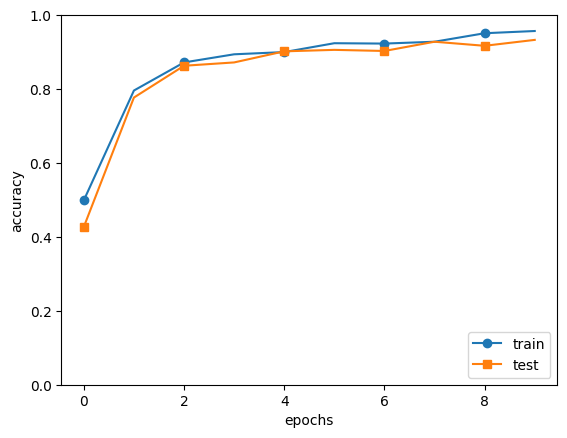

In [ ]:
#MNISTデータをCNNで学習させる

import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
#from simple_convnet import SimpleConvNet
from trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 10

network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#### 学習前後のフィルタの確認

学習前のフィルター


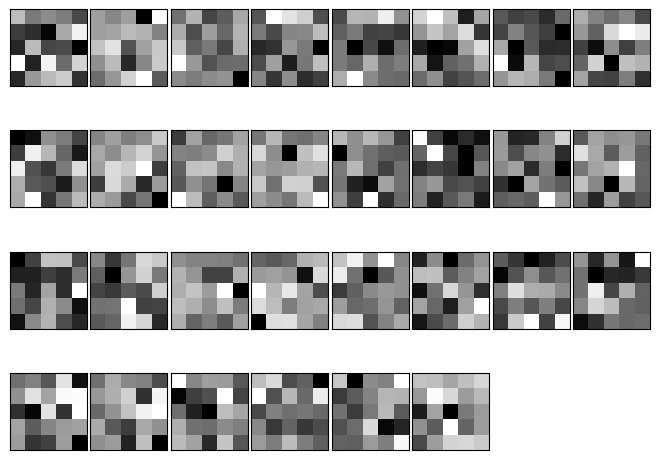

--------------------------------------------------------------
学習後のフィルター


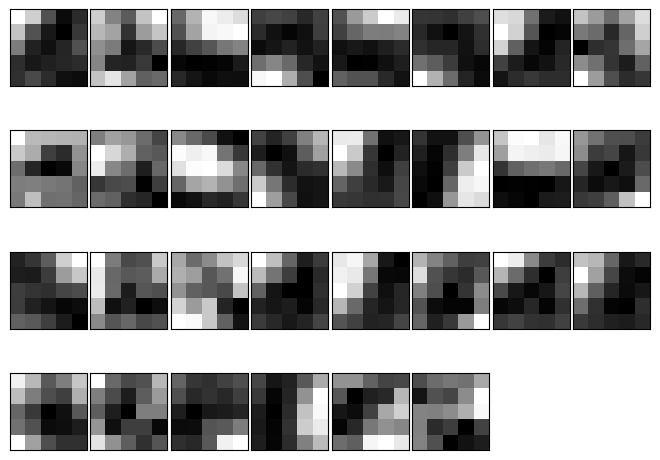

In [ ]:
#学習によるフィルタ最適化の可視化

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    f_n, c, k_h, k_w = filters.shape
    ny = int(np.ceil(f_n / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(f_n):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# ランダム初期化後の重み
print("学習前のフィルター")
filter_show(network.params['W1'])
print("--------------------------------------------------------------")

# 学習後の重み
print("学習後のフィルター")
network.load_params("params.pkl")
filter_show(network.params['W1'])

学習前は、白黒の濃淡に規則性は見られませんが、\
学習後は、白黒の濃淡に規則性が見られるようになりました。

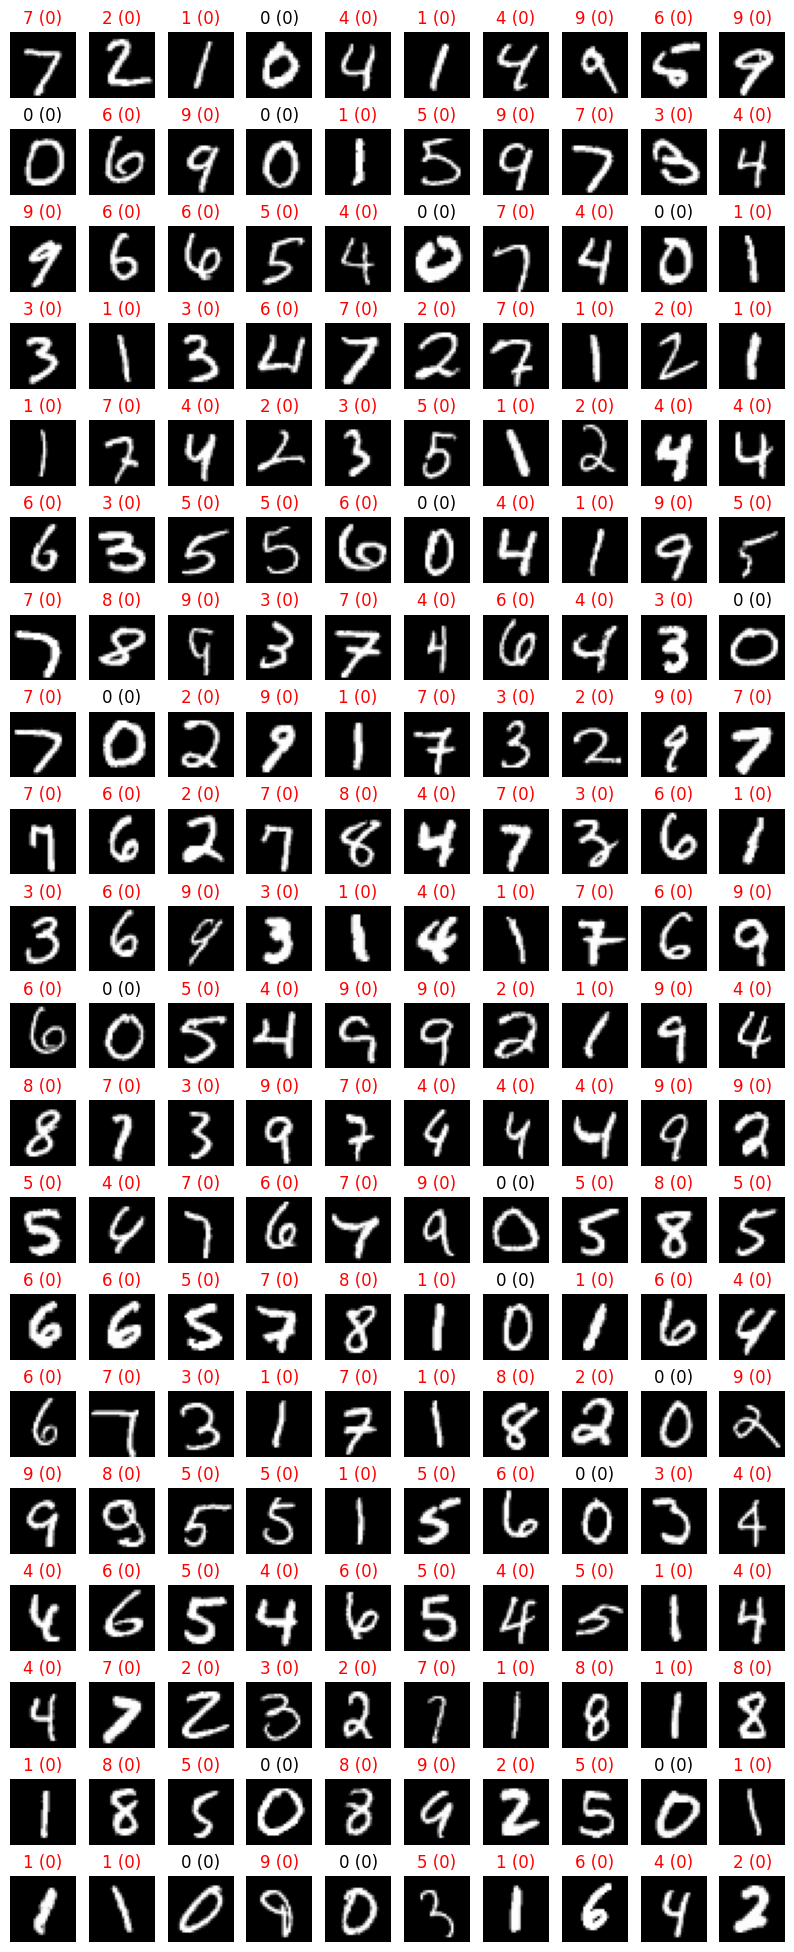

In [ ]:
results = network.predict(x_test)
plt.figure(figsize=(10,25))

for i in range(200):
    label = results[i].argmax()
    gt_label = t_test[i].argmax()

    plt.subplot(20, 10, i+1)
    if label == gt_label:
        title_color = 'black'
    else:
        title_color = 'red'
    plt.title(str(label) + ' (' + str(gt_label) + ')', color=title_color)
    plt.axis('off')
    plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')

plt.show()

# CIFAR-10を使用した学習、推論

## CIFAR10を使用した学習、評価

### データの確認

CIFAR-10 データセットは、10 クラス 60,000 枚の 32x32 カラー画像とクラスラベルが付与されたデータセットです。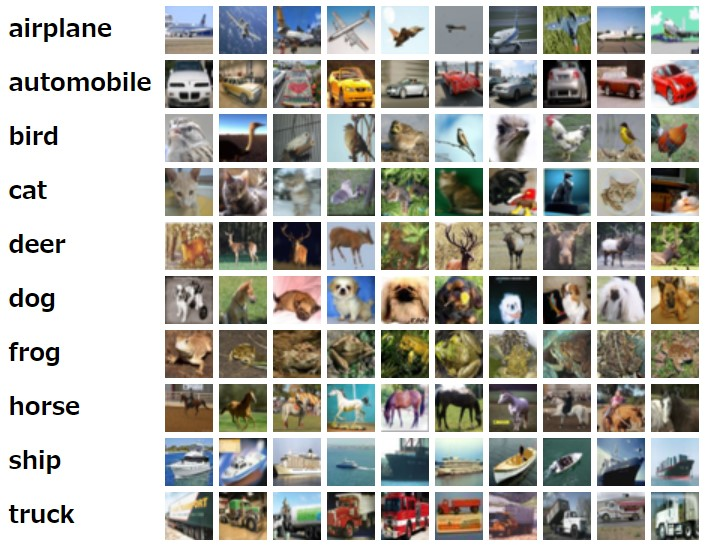

GPUを使うと、学習を高速化することができます。\
この先のコードはGPUを使用してもCPUのままでも実行できます。\
Google ColabでGPUを使用するときは、メニューバーの『ランタイム』から『ランタイムのタイプを変更』をクリックすると表示されるダイアログで、『ハードウェア アクセラレータ』欄から『T4 GPU』を選択します。\
それまでに他のセルを実行していた場合は、『ランタイムを接続解除して削除』と出るので、『OK』をクリックし、『保存』して元の画面に戻ります。これまでに実行していたセルはリセットされるので、適宜必要なセルの再実行をしてください。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchsummary
from time import time
import time

In [ ]:
# GPUの確認
use_cuda = torch.cuda.is_available()
print('Use CUDA:', use_cuda)

Use CUDA: False


In [ ]:
# CIFAR10のダウンロード
train_data = torchvision.datasets.CIFAR10(root="./", train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.CIFAR10(root="./", train=False, transform=transforms.ToTensor(), download=True)

print('***train_data***\n', train_data)
print('***test_data***\n', test_data)

100%|██████████| 170498071/170498071 [00:02<00:00, 73199857.88it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified
***train_data***
 Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()
***test_data***
 Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: ToTensor()


出力結果から、train_dataには50000枚、test_dataには10000枚のデータが入っていることがわかります。

torch.Size([3, 32, 32])


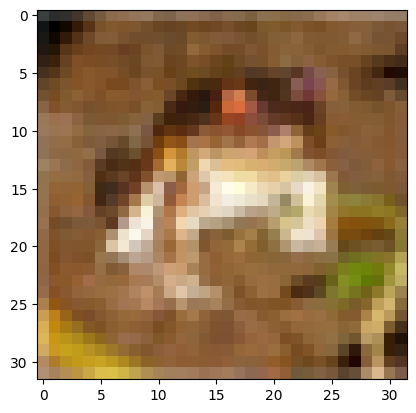

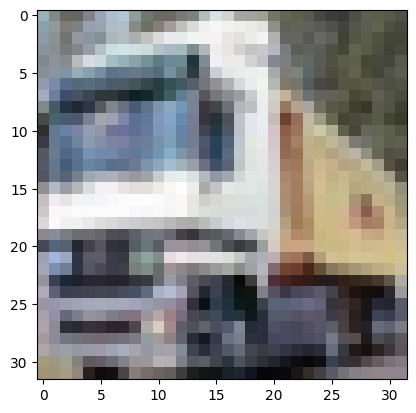

In [ ]:
# データの確認

print(train_data[0][0].shape)
img0 = np.transpose(train_data[0][0], (1, 2, 0))
plt.imshow(img0)
plt.show()
img1 = np.transpose(train_data[1][0], (1, 2, 0))
plt.imshow(img1)

torch.Size([3, 32, 32])とは、カラー画像(Red, Green, Blue)の画素数32×32ということを表します。

### CNNを構築する

In [ ]:
# 画像分類に適したCNNのアーキテクチャ
# コメントアウトしてある活性化関数、プーリング層なども変更して、試してみてください

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 畳み込み層1: 3チャネルの入力画像、16チャネルの出力、3x3のカーネル、ストライド1、パディング1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        # 畳み込み層2: 16チャネルの入力、32チャネルの出力、3x3のカーネル、ストライド1、パディング1
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        # 全結合層1: 8x8x32の入力（畳み込み層2の出力を平滑化）、1024ユニット
        self.l1 = nn.Linear(8 * 8 * 32, 1024)
        # 全結合層2: 1024ユニット、1024ユニット
        self.l2 = nn.Linear(1024, 1024)
        # 全結合層3: 1024ユニット、10ユニット（クラス数に対応）
        self.l3 = nn.Linear(1024, 10)
        # self.l3 = nn.Linear(1024, 512)
        # 活性化関数: LeakyReLUを使用
        self.act = nn.LeakyReLU(0.15)
        # ↓その他の活性化関数
        # self.act = nn.Sigmoid()
        # self.act = nn.ReLU()
        # 最大プーリング層: 2x2のウィンドウ、ストライド2
        self.pool = nn.MaxPool2d(2, 2)
        # ↓その他のプーリング層
        # 平均プーリング層: 2x2のウィンドウ、ストライド2
        # self.pool = nn.AvgPool2d(2, 2)

    def forward(self, x):
        # 畳み込み層1を適用し、活性化関数ReLUを適用し、最大プーリングを行う
        h = self.pool(self.act(self.conv1(x)))
        # 畳み込み層2を適用し、活性化関数ReLUを適用し、最大プーリングを行う
        h = self.pool(self.act(self.conv2(h)))
        # 平滑化: バッチサイズ x (8*8*32) の形状に変形
        h = h.view(h.size()[0], -1)
        # 全結合層1と活性化関数ReLUを適用
        h = self.act(self.l1(h))
        # 全結合層2と活性化関数ReLUを適用
        h = self.act(self.l2(h))
        # 全結合層3を適用して出力を得る
        h = self.l3(h)
        return h

In [ ]:
model = CNN()
if use_cuda:
    model.cuda()

# 確率的勾配降下法
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# モデルの情報を表示
# (3, 32, 32)で入力データの形状を指定する
torchsummary.summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         LeakyReLU-2           [-1, 16, 32, 32]               0
         MaxPool2d-3           [-1, 16, 16, 16]               0
            Conv2d-4           [-1, 32, 16, 16]           4,640
         LeakyReLU-5           [-1, 32, 16, 16]               0
         MaxPool2d-6             [-1, 32, 8, 8]               0
            Linear-7                 [-1, 1024]       2,098,176
         LeakyReLU-8                 [-1, 1024]               0
            Linear-9                 [-1, 1024]       1,049,600
        LeakyReLU-10                 [-1, 1024]               0
           Linear-11                   [-1, 10]          10,250
Total params: 3,163,114
Trainable params: 3,163,114
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forw

### 学習する

In [ ]:
# ミニバッチサイズ・エポック数の設定
batch_size = 64
epoch_num = 15
# 1エポック内のイテレーション数の計算
n_iter = len(train_data) // batch_size

# データローダーの設定
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# 誤差関数の設定
# クロスエントロピー誤差関数は、多クラス分類タスクに適した誤差関数
# モデルの予測と正解ラベルとの誤差を計算し、誤差を最小化することを目指す。
criterion = nn.CrossEntropyLoss()

# use_cudaがTrueの場合、モデルの計算をGPU上で行う。
if use_cuda:
    criterion.cuda()

# ネットワークを学習モードへ変更
model.train()

start_time = time.time()
# エポックループ
for epoch in range(1, epoch_num+1):
    # エポック内の累積誤差を追跡するための変数total_loss
    total_loss = 0.0
    # エポック内で正確に予測されたサンプルの数を追跡する変数correct_predictions
    correct_predictions = 0

    # ミニバッチループ
    for images, labels in train_loader:

        if use_cuda:
            images = images.cuda()
            labels = labels.cuda()

        outputs = model(images)

        loss = criterion(outputs, labels)

        # モデルの勾配情報を初期化
        model.zero_grad()
        # 誤差逆伝播を実行して勾配を計算
        loss.backward()
        # オプティマイザ(SGD)を使用してモデルのパラメータ更新
        optimizer.step()

        # total_lossに誤差を加算
        total_loss += loss.item()

        predicted = torch.argmax(outputs, dim=1)
        correct_predictions += torch.sum(predicted == labels)

    # 各エポックの終了時に、エポック数、平均誤差、平均正解率、経過時間を表示
    print("Epoch: {}, Mean Loss: {:.4f}, Mean Accuracy: {:.4f}, Elapsed Time: {:.2f}s".format(epoch,
                                                                                               total_loss / n_iter,
                                                                                               correct_predictions.item() / len(train_data),
                                                                                               time.time() - start_time))

Epoch: 1, Mean Loss: 1.8854, Mean Accuracy: 0.3070, Elapsed Time: 66.63s


### 評価する

In [ ]:
# データローダーの準備
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)

# ネットワークを評価モードへ変更
model.eval()

# 評価の実行
correct_predictions = 0

with torch.no_grad():
    for image, label in test_loader:

        if use_cuda:
            image = image.cuda()
            label = label.cuda()

        y = model(image)

        # 予測結果からクラスラベルを決定し、正解ラベルと比較
        # 正解に予測されたサンプルの数をcorrect_predictionsに加算
        pred = torch.argmax(y, dim=1)
        correct_predictions += torch.sum(pred == label)

# テスト精度の表示
test_accuracy = correct_predictions.item() / len(test_data)
print("Test Accuracy: {:.4f}".format(test_accuracy))

## 正規化

正規化層は通常、ニューラルネットワーク内で層間のデータ分布を安定化させ、トレーニングの収束を助けるために使用されます。\
ここでは先ほどのCIFAR10の画像分類タスクに関するコードに正規化層を追加して、結果を見ていきます。

### 正規化層を入れたCNNを構築する

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.l1 = nn.Linear(8 * 8 * 32, 1024)
        self.l2 = nn.Linear(1024, 1024)
        self.l3 = nn.Linear(1024, 10)
        self.act = nn.LeakyReLU(0.15)
        self.pool = nn.MaxPool2d(2, 2)

        # バッチ正規化層を追加
        # 畳み込み層(2次元データ(画像))にバッチ正規化を適用する場合は、BatchNorm2dを使用する。
        # self.conv1,2の出力チャネル数が16, 32であるため、その出力に正規化を適用する。
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        # 全結合層(1Dデータの場合)にバッチ正規化を適用する場合は、BatchNorm1dを使用する。
        # self.l1の出力ユニット数が1024であるため、その出力に正規化を適用する。
        self.bn3 = nn.BatchNorm1d(1024)

    def forward(self, x):
        h = self.pool(self.act(self.bn1(self.conv1(x))))
        h = self.pool(self.act(self.bn2(self.conv2(h))))
        h = h.view(h.size()[0], -1)
        h = self.act(self.bn3(self.l1(h)))
        h = self.act(self.l2(h))
        h = self.l3(h)
        return h

In [ ]:
model = CNN()
if use_cuda:
    model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
torchsummary.summary(model, (3, 32, 32))

### 学習する

In [ ]:
batch_size = 64
epoch_num = 15
n_iter = len(train_data) // batch_size

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
criterion = nn.CrossEntropyLoss()

if use_cuda:
    criterion.cuda()

model.train()

start_time = time.time()

for epoch in range(1, epoch_num+1):
    total_loss = 0.0
    correct_predictions = 0

    for images, labels in train_loader:

        if use_cuda:
            images = images.cuda()
            labels = labels.cuda()

        outputs = model(images)

        loss = criterion(outputs, labels)

        model.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        predicted = torch.argmax(outputs, dim=1)
        correct_predictions += torch.sum(predicted == labels)

    print("Epoch: {}, Mean Loss: {:.4f}, Mean Accuracy: {:.4f}, Elapsed Time: {:.2f}s".format(epoch,
                                                                                               total_loss / n_iter,
                                                                                               correct_predictions.item() / len(train_data),
                                                                                               time.time() - start_time))

### 評価する

In [ ]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)

model.eval()

correct_predictions = 0

with torch.no_grad():
    for image, label in test_loader:

        if use_cuda:
            image = image.cuda()
            label = label.cuda()

        y = model(image)

        pred = torch.argmax(y, dim=1)
        correct_predictions += torch.sum(pred == label)

test_accuracy = correct_predictions.item() / len(test_data)
print("Test Accuracy: {:.4f}".format(test_accuracy))

今回はネットワークが浅いためか、正規化層を入れても、精度の向上は見られませんでした。\
一般的には、正規化層はモデルの学習を安定化させ、高い性能を実現するのに役立つことが多いです。例えば、複雑なモデルや分布が均一でないデータセット、過学習のリスクがある、などに有効だと言えるでしょう。しかし、今挙げた例に当てはまる場合にも、正規化層が常に精度向上につながるとは限りません。\
モデルの設計とデータの特性に合わせて、正規化層を使用するかどうかを検討することが重要になります。

# 課題
1. 以下のPythonコードを完成させて、シンプルなCNNモデルを構築してください。このモデルは、1つの畳み込み層、1つのプーリング層、および1つの全結合層から構成されます。畳み込み層には8つの出力チャネルがあり、フィルターサイズは3x3です。プーリング層は最大プーリング層で、2x2のウィンドウで2x2のストライドを持ちます。全結合層のユニット数は10です。

In [ ]:
# ここにコードを実装
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # 畳み込み層: 3チャネルの入力画像、8チャネルの出力、3x3のカーネル
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3)
        # プーリング層: 最大プーリング、2x2のウィンドウ、ストライド2
        # TODO: プーリング層の定義
        # 全結合層: 出力ユニット数10
        # TODO: 全結合層の定義

    def forward(self, x):
        # 畳み込み層1を適用
        # TODO: 畳み込み層の適用
        x = nn.functional.relu(x)
        # プーリング層を適用
        # TODO: プーリング層の適用
        # 平滑化: バッチサイズ x (出力チャネル数 * 15 * 15) の形状に変形
        x = x.view(x.size(0), -1)
        # 全結合層を適用
        # TODO: 全結合層の適用
        return x

2. 以下の要件を満たすコードを作成してください。

1.MNISTデータセットをダウンロードし、トレーニングデータとテストデータに分割します。\
2.CNNモデルを構築してください。モデルは以下のレイヤーを持つ必要があります。\
　・畳み込み層1: 入力チャネル数1、出力チャネル数16、カーネルサイズ3x3、ストライド1、パディング1\
　・活性化関数: ReLU\
　・プーリング層1: 最大プーリング、ウィンドウサイズ2x2、ストライド2\
　・畳み込み層2: 出力チャネル数32、カーネルサイズ3x3、ストライド1、パディング1\
　・活性化関数: ReLU\
　・プーリング層2: 最大プーリング、ウィンドウサイズ2x2、ストライド2\
　・平滑化操作\
　・全結合層: 入力ユニット数はフラット化された特徴マップの次元数、出力ユニット数は10（0から9の数字のクラス数）\
3.モデルのトレーニングを行ってください。エポック数、バッチサイズ、損失関数、最適化アルゴリズムなどのハイパーパラメータを設定してください。\
4.モデルをトレーニングし、トレーニングデータに対する精度を報告してください。\
5.モデルをテストデータに適用し、テストデータに対する精度を報告してください。

In [ ]:
# ここにコードを実装
